<a href="https://colab.research.google.com/github/CrAvila/IA/blob/main/Taller1/IA_Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div>
<img src="https://drive.google.com/uc?export=download&id=1lhTXu7FShFdtXWptJH3ZOPyxOdFY8kOf" width="500"/>
</div>


## Pontificia Universidad Javeriana

#### Departamento de Ingeniería Electrónica

#### Inteligencia Artificial

## Taller 1: Modelos Probabilísticos

Alumno: Carlos Ávila

Profesor: Alexander Caicedo Dorado

# Introducción

En el ámbito de la Inteligencia Artificial, los modelos probabilísticos son herramientas esenciales para dar sentido a la información compleja. En este taller se explora la aplicación práctica de los modelos probabilísticos, concretamente en el uso probabilidad Bayesiana para para predecir la probabilidad de que una persona sufra un accidente cerebrovascular.

El taller comienza introduciendo el concepto de modelos probabilísticos y su relevancia en el análisis de datos sanitarios. El objetivo es lograr discernir las variables significativas que influyen en la aparición de este fenómeno, así como la clasificación del riesgo de un individuo dadas ciertas condiciones. 

El taller culmina con una evaluación del rendimiento del modelo utilizando un conjunto independiente de datos para las pruebas. Esta evaluación mide la precisión del modelo a la hora de predecir la aparición de accidentes cerebrovasculares, indicando sobre su fiabilidad y eficacia, así como proponiendo mejoras y conluyendo sobre los resultados. 

Según la Organización Mundial de la Salud (OMS), lso accidentes cerebrovasculares son la segunda causa de muerte en el mundo, responsable de aproximadamente el 11% del total de fallecimientos.

Este conjunto de datos se utiliza para predecir la probabilidad de que un paciente sufra uno en función de parámetros como el sexo, la edad, diversas enfermedades y el hábito de fumar. Cada fila de los datos proporciona información relevante sobre el paciente.

Información de los Atributos:

1. **id**: Unique identifier

2. **gender**: "Male", "Female", or "Other"

3. **age**: Age of the patient

4. **hypertension**: 0 if the patient does not have hypertension, 1 if the patient has hypertension

5. **heart_disease**: 0 if the patient does not have any heart disease, 1 if the patient has a heart disease

6. **ever_married**: "No" or "Yes"

7. **work_type**: "Children", "Govt_job", "Never_worked", "Private", or "Self-employed"

8. **residence_type**: "Rural" or "Urban"

9. **avg_glucose_level**: Average glucose level in blood

10. **bmi**: Body mass index

11. **smoking_status**: "Formerly smoked", "Never smoked", "Smokes", or "Unknown"

12. **stroke**: 1 if the patient suffered a stroke, 0 otherwise


## Procesamiento de Datos

In [98]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
from itertools import combinations

In [102]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1NYlG6ZYmh-TdHgEuzTz1K-yfFxIoFEUC')

In [101]:
display(data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Procesamiento de Datos

### Categorización de variables cuantitativas

 Al transformar los datos continuos en categorías significativas, pretendemos comprender mejor el impacto de estas variables en la predicción de los accidentes cerebrovasculares. De esta manera, podemos conglomerar muchos resultados similares que no necesariamente deberían tener su propia rama en un árbol de probabilidades. 

#### Edad

La variable "age" proporciona información sobre las diferentes etapas de la vida que podrían influir en el riesgo de ictus. Categorizaremos la edad en los siguientes grupos:

- **Niño**: De 0 a 18 años
- **Adultos**: De 18 a 65 años
- **Mayores**: 65 años o más

Categorizar la edad nos ayuda a captar los factores de riesgo relacionados con la edad y a diferenciar la susceptibilidad al ACV entre los distintos grupos de edad.

#### Nivel medio de glucosa

La variable "avg_glucose_level" refleja los niveles de glucosa en sangre, que pueden ser indicativos del riesgo de ACV. Categorizaremos los niveles medios de glucosa de la siguiente manera:

- **Bajo**: Nivel de glucosa de 0 a 80 mg/dL.
- **Normal**: Nivel de glucosa de 80 a 120 mg/dL
- **Alto**: Nivel de glucosa igual o superior a 120 mg/dL

La categorización de los niveles de glucosa nos permite discernir la relación entre la glucemia y el riesgo de ACV, ayudando a identificar posibles factores de riesgo.

#### Índice de masa corporal (IMC)

La variable "bmi" proporciona información sobre los factores de riesgo de ictus relacionados con el peso. Categorizaremos el IMC en los siguientes grupos:

- **Peso insuficiente**: IMC de 0 a 18,5
- **Normal**: IMC de 18,5 a 25
- **Sobrepeso**: IMC igual o superior a 25
- **Desconocido**: Se desconoce el valor del IMC

La categorización del IMC ayuda a comprender cómo se relacionan las categorías de peso con el riesgo de ACV y a identificar posibles factores de riesgo.

Adicionalmente, se mapean las variables con respuestas "Yes"/"No" para que tengan respuestas binarias estandarizadas al igual que las demás variables binarias.

El fundamento de la categorización de variables cuantitativas radica en la simplificación del análisis de datos y la mejora de la interpretabilidad. La categorización nos permite identificar patrones, tendencias y factores de riesgo potenciales que contribuyen a la aparición de ictus. Al agrupar los datos en categorías significativas, podemos integrar eficazmente estas variables en modelos predictivos y tomar decisiones informadas en escenarios de atención sanitaria.

In [103]:
events = {
    "quantitative" : {

        "age": {
            "ranges" : [
                (0,18),
                (18,65),
                (65, float('inf'))
            ],

            "categories" : [
                'Child',
                'Adult',
                'Senior'
            ]
        },

        "avg_glucose_level": {
            "ranges" : [
                (0,80),
                (80,120),
                (120, float('inf'))
            ],

            "categories" : [
                'Low',
                'Normal',
                'High'
            ]
        },

        "bmi": {
            "ranges": [
                (0,18.5),
                (18.5, 25),
                (25, float('inf'))
            ],

            "categories": [
                'Underweight',
                'Normal',
                'Overweight',
                'Unknown'
            ]
        }
    },

    "qualitative" :  {
        "gender" : data['gender'].unique().tolist(),
        "work_type": data['work_type'].unique().tolist(),
        "Residence_type" : data['Residence_type'].unique().tolist(),
        "smoking_status" : data['smoking_status'].unique().tolist()
    },

    "boolean" : {
        "hypertension" : {
            "statuses" : [0,1]
        },

        "heart_disease" : {
            "statuses" : [0,1]
        },

        "ever_married" : {
            "statuses" : [0,1]
        } ,

        "stroke" : {
            "statuses" : [0,1]
        }
    }
}

In [104]:
#Function to process original data
def process_data(df, variables_to_use):

    processed_dataframe = df.copy()

    #Classify que quantitative values
    for quantitative_column in list(events['quantitative'].keys()):

        #Specific function to classify the column value
        def categorize(value):
            if isinstance(value, int) or isinstance(value, float):
                for i, (lower, upper) in enumerate(events["quantitative"][quantitative_column]["ranges"]):
                    if lower <= value < upper:
                        return events["quantitative"][quantitative_column]["categories"][i]
            else:
                return value

        # Replace value into the processed dataframe
        processed_dataframe[quantitative_column] = processed_dataframe[quantitative_column].apply(categorize)

    replace_mapping = {
        "No" : 0,
        "Yes" : 1
    }

    processed_dataframe['ever_married'] = processed_dataframe['ever_married'].replace(replace_mapping)

    new_columns = [col for col in variables_to_use]
    new_columns.append('stroke')

    cols_to_drop = [col for col in data.columns.values.tolist() if col not in new_columns]
    cols_to_drop = [col for col in cols_to_drop if col in processed_dataframe.columns.tolist()]

    processed_dataframe = processed_dataframe.drop(columns=cols_to_drop)
    processed_dataframe.fillna('Unknown', inplace=True)

    processed_dataframe = processed_dataframe[new_columns]

    return processed_dataframe

In [108]:
processed_data = process_data(data, [col for col in data.columns.tolist() if col != 'id' and col != 'stroke'])

display(processed_data)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Senior,0,1,1,Private,Urban,High,Overweight,formerly smoked,1
1,Female,Adult,0,0,1,Self-employed,Rural,High,Unknown,never smoked,1
2,Male,Senior,0,1,1,Private,Rural,Normal,Overweight,never smoked,1
3,Female,Adult,0,0,1,Private,Urban,High,Overweight,smokes,1
4,Female,Senior,1,0,1,Self-employed,Rural,High,Normal,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,Senior,1,0,1,Private,Urban,Normal,Unknown,never smoked,0
5106,Female,Senior,0,0,1,Self-employed,Urban,High,Overweight,never smoked,0
5107,Female,Adult,0,0,1,Self-employed,Rural,Normal,Overweight,never smoked,0
5108,Male,Adult,0,0,1,Private,Rural,High,Overweight,formerly smoked,0


In [8]:
def split_data(df, test_percentage):
    # Separate data into stroke and no stroke groups
    stroke_group = df[df['stroke'] == 1]
    no_stroke_group = df[df['stroke'] == 0]

    # Shuffle records in both groups
    stroke_group_shuffled = stroke_group.sample(frac=1, random_state=42).reset_index(drop=True)
    no_stroke_group_shuffled = no_stroke_group.sample(frac=1, random_state=42).reset_index(drop=True)

    # Calculate the number of records needed for 20 %
    num_test_stroke = int(test_percentage * len(stroke_group_shuffled))
    num_test_no_stroke = int(test_percentage * len(no_stroke_group_shuffled))

    # Create test and training sets for the no stroke group
    test_set_no_stroke = no_stroke_group_shuffled[:num_test_no_stroke]
    train_set_no_stroke = no_stroke_group_shuffled[num_test_no_stroke:]

    # Create test and training set for the stroke group
    test_set_stroke = stroke_group_shuffled[:num_test_stroke]
    train_set_stroke = stroke_group_shuffled[num_test_stroke:]

    # Combine test sets
    final_test_set = pd.concat([test_set_stroke, test_set_no_stroke])

    # Combine train sets
    final_train_set = pd.concat([train_set_stroke, train_set_no_stroke])

    return final_test_set, final_train_set

### Selección de Variables

Ahora debemos escoger qué variables utilizar para nuestro modelo probabilístico. Para determinar las variables más significativas, existen muchas herramientas estadísticas que se podrían utilizar, además de cierto conocimiento técnico en el área, sin embargo en este acercamiento se tratará de estudiar algunos comportamientos básicos de las variables de manera intuitiva y ver si tienen algún tipo de correlación.

Para ello, estudiaremos los perfiles por separado de las personas que sí tuvieron un ACV, y los que no, 

In [110]:
stroke_dataset = processed_data[processed_data['stroke'] == 1]
display(stroke_dataset)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Senior,0,1,1,Private,Urban,High,Overweight,formerly smoked,1
1,Female,Adult,0,0,1,Self-employed,Rural,High,Unknown,never smoked,1
2,Male,Senior,0,1,1,Private,Rural,Normal,Overweight,never smoked,1
3,Female,Adult,0,0,1,Private,Urban,High,Overweight,smokes,1
4,Female,Senior,1,0,1,Self-employed,Rural,High,Normal,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,Adult,0,0,1,Private,Rural,Normal,Overweight,Unknown,1
245,Female,Child,0,0,0,children,Rural,Low,Overweight,Unknown,1
246,Female,Senior,0,0,1,Self-employed,Rural,Low,Overweight,formerly smoked,1
247,Male,Senior,1,0,1,Self-employed,Rural,Normal,Unknown,Unknown,1


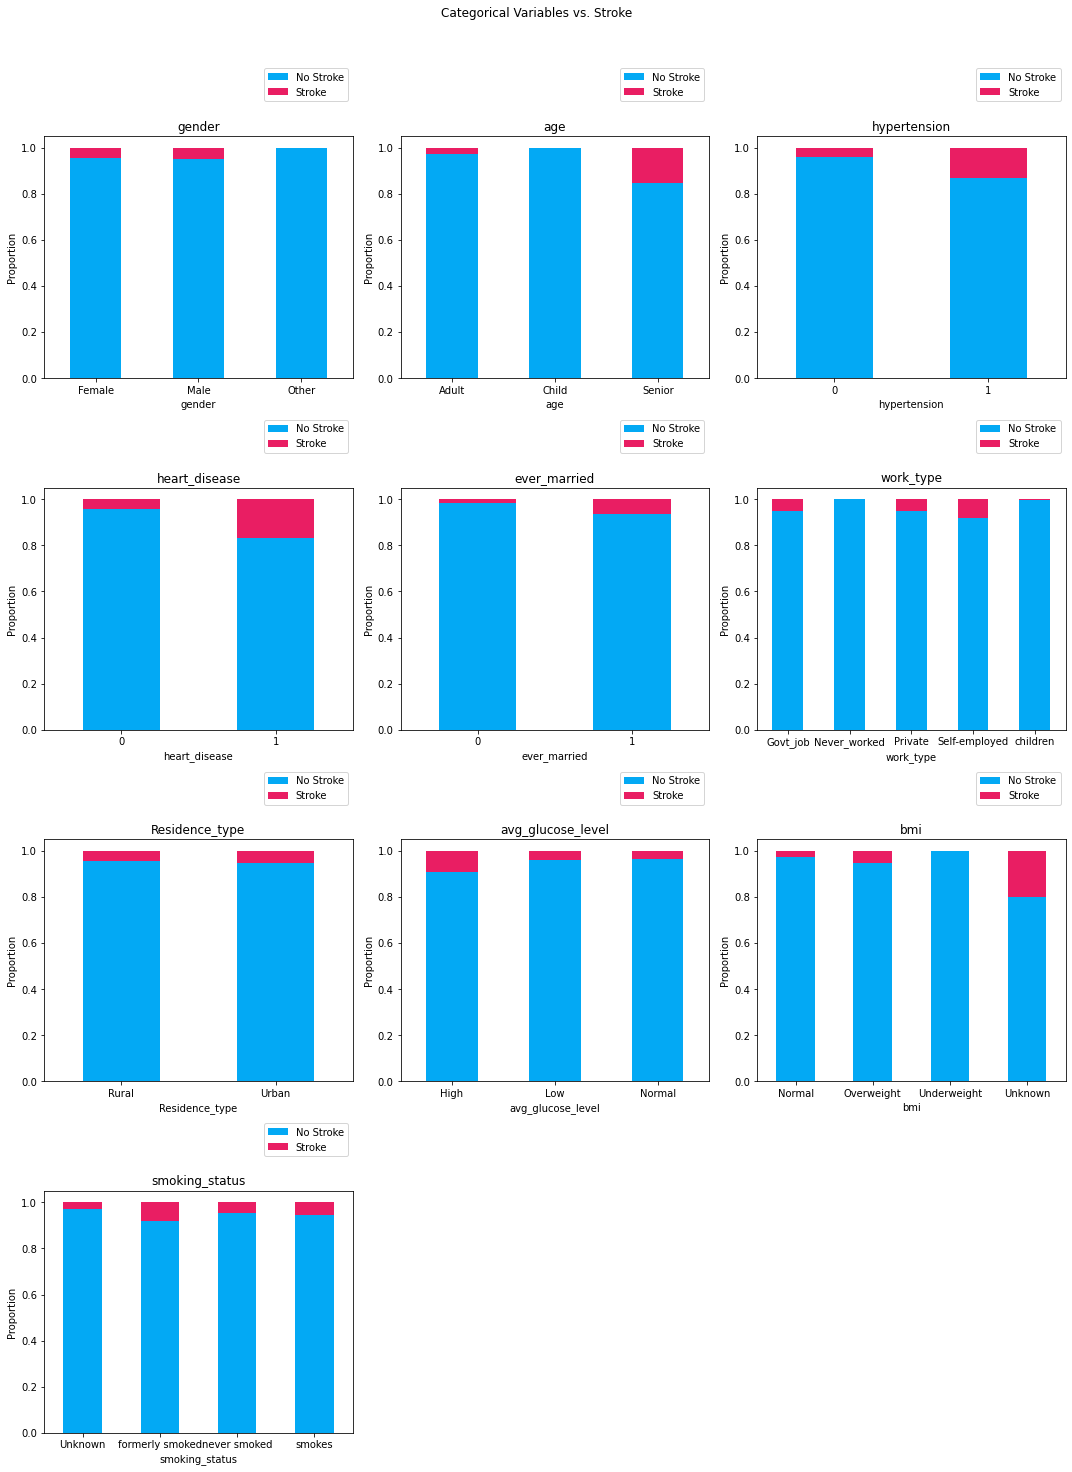

In [189]:
ategorical_vars = [col for col in processed_data.columns.tolist() if col != 'stroke']

blue_rgb = (0.01176471, 0.6627451, 0.95686275)   
red_rgb = (0.91372549, 0.11764706, 0.38823529)
           
colors = [blue_rgb, red_rgb]

# Create a discrete colormap
cmap = ListedColormap(colors)

# Create a figure with subplots for categorical variables
num_plots = len(categorical_vars)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Categorical Variables vs. Stroke', y=1.02)

for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    
    # Check if the category has data in both stroke and no-stroke groups
    if set(processed_data[var].unique()) == {0}:
        continue
    
    ax = axes[row, col]
    contingency_table = pd.crosstab(processed_data[var], processed_data['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate proportions
    proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    
    # Plot the proportions using the custom colormap
    proportions.plot(kind='bar', stacked=True, ax=ax, cmap=cmap)
    ax.set_ylabel('Proportion')
    ax.set_xlabel(var)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    # Create a custom legend above the plot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["No Stroke", "Stroke"], loc="upper right", bbox_to_anchor=(1, 1.3))
    
    # Set the variable name as the title above the plot
    ax.set_title(var, position=(0.5, 1.15))
    
# Remove the x and y labels from empty subplots
for i in range(len(categorical_vars), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [109]:
variables_to_use = [
    'age',
    'avg_glucose_level',
    'bmi',
    'hypertension',
    'heart_disease',
]

In [9]:
test_set, train_set = split_data(processed_data, 0.2)

In [10]:
display(test_set)
display(train_set)

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
0,Senior,High,Overweight,0,0,1
1,Senior,Low,Overweight,1,1,1
2,Adult,High,Overweight,0,1,1
3,Adult,High,Overweight,0,0,1
4,Senior,Normal,Unknown,0,0,1
...,...,...,...,...,...,...
967,Adult,Normal,Overweight,0,0,0
968,Child,Normal,Normal,0,0,0
969,Adult,Normal,Underweight,0,0,0
970,Adult,High,Overweight,0,0,0


,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
49,Adult,Normal,Overweight,0,0,1
50,Senior,High,Overweight,1,0,1
51,Adult,Normal,Overweight,0,0,1
52,Adult,Low,Normal,0,0,1
53,Senior,Normal,Overweight,0,0,1
...,...,...,...,...,...,...
4856,Child,Low,Normal,0,0,0
4857,Adult,Normal,Overweight,1,0,0
4858,Adult,High,Overweight,0,0,0
4859,Child,Normal,Underweight,0,0,0


## Construcción del Modelo



In [11]:
from pandas.io.formats.info import DataFrameInfo
def build_tree(data):

    count_dict = {}
    prob_dict = {}
    
    unique_values_dict = {
        column: data[column].unique().tolist() for column in data.columns
    }

    def calculate_probabilities(df, values_dict, conditions=(), index=0, accumulated_prob=1.0, prob_dict={}):

        if index == len(categories):  # Stop when we reach the last category
            return

        current_category = categories[index]
        current_values = values_dict[current_category]

        for value in current_values:
            new_conditions = conditions + ((current_category, value),)

            filtered_df = df
            for condition in new_conditions:
                column, val = condition
                filtered_df = filtered_df[filtered_df[column] == val]

            count = len(filtered_df)

            prob = count / (len(df) or 1)
            # Calculate the probability for this branch
            branch_prob = accumulated_prob * prob

            if index not in prob_dict:
                prob_dict[index] = {}
                count_dict[index] = {}

            # Store the branch probability
            prob_dict[index][new_conditions] = branch_prob
            count_dict[index][new_conditions] = count

            next_index = index + 1
            calculate_probabilities(filtered_df, values_dict, new_conditions, next_index, accumulated_prob, prob_dict)


    categories = list(unique_values_dict.keys())
    calculate_probabilities(data, unique_values_dict, prob_dict=prob_dict)

    return count_dict, prob_dict

In [12]:
# Calculate counts and probabilities as a tree
count_tree, probability_tree = build_tree(train_set)

In [13]:
def format_condition(condition, type):
    abbreviated_conditions = [f"{str(col)[0].capitalize()}{str(val)[0]}" for col, val in condition]

    formatted_condition = ""

    if type == "conditional":
        if len(abbreviated_conditions) > 1:
            event = abbreviated_conditions[-1]
            previous_events = abbreviated_conditions[:-1]

            formatted_condition = f"{event} | {' ^ '.join([condition for condition in previous_events])}"
        else:
            formatted_condition = abbreviated_conditions[0]
    else:
        formatted_condition = f"{' ^ '.join([condition for condition in abbreviated_conditions])}"

    return formatted_condition

def print_dict_as_tree(probs, counts):
    for (key, value), (key2, value2) in zip(probs.items(), counts.items()):
        if isinstance(key, tuple):
            formatted_key = format_condition(key, "conditional")
        else:
            formatted_key = f"\nTree Height: {key}\n"

        if isinstance(value, dict):
            print(formatted_key)
            print_dict_as_tree(value, value2)
        else:
            p = value2/len(train_set)
            formatted_intersection = format_condition(key, "intersection")
            conditional_string = f"P({formatted_key}) = {'{0:.10f}'.format(value)}"
            intersection_string = f"P({formatted_intersection}) = {'{0:.10f}'.format(p)}"
            print(f"{conditional_string} -> {intersection_string}")

print_dict_as_tree(probability_tree, count_tree)


Tree Height: 0

P(AA) = 0.6255808266 -> P(AA) = 0.6255808266
P(AS) = 0.2029836146 -> P(AS) = 0.2029836146
P(AC) = 0.1714355588 -> P(AC) = 0.1714355588

Tree Height: 1

P(AN | AA) = 0.4933541830 -> P(AA ^ AN) = 0.3086329176
P(AH | AA) = 0.1993745113 -> P(AA ^ AH) = 0.1247248716
P(AL | AA) = 0.3072713057 -> P(AA ^ AL) = 0.1922230374
P(AN | AS) = 0.4096385542 -> P(AS ^ AN) = 0.0831499144
P(AH | AS) = 0.3301204819 -> P(AS ^ AH) = 0.0670090487
P(AL | AS) = 0.2602409639 -> P(AS ^ AL) = 0.0528246515
P(AN | AC) = 0.5278174037 -> P(AC ^ AN) = 0.0904866716
P(AH | AC) = 0.1540656205 -> P(AC ^ AH) = 0.0264123258
P(AL | AC) = 0.3181169757 -> P(AC ^ AL) = 0.0545365615

Tree Height: 2

P(BO | AA ^ AN) = 0.7329635499 -> P(AA ^ AN ^ BO) = 0.2262166789
P(BN | AA ^ AN) = 0.2297939778 -> P(AA ^ AN ^ BN) = 0.0709219858
P(BU | AA ^ AN) = 0.0309033281 -> P(AA ^ AN ^ BU) = 0.0095377843
P(BU | AA ^ AN) = 0.0063391442 -> P(AA ^ AN ^ BU) = 0.0019564686
P(BO | AA ^ AH) = 0.7666666667 -> P(AA ^ AH ^ BO) = 0.09562

## Evaluación del Modelo

Ahora que ya tenemos las probabilidades de todas las ramas posibles y todas las intersecciones posibles, nos interesa concretamente el nivel de altura $5$ del árbol de probabilidades, ya que ahí se encuentra la probabilidad de tener un accidente cerebrovascular dadas ya ciertas combinaciones de variables. Ahora, hay que obtener estas probabilidades introduciendo únicamente los valores de las variables a evaluar.

Al ingresar los datos de la siguiente manera, obtenemos la probabilidad condicional correspondiente a las variables de entrada:

In [14]:
try:
    print(probability_tree[5][(
    ('age', 'Child'),
    ('avg_glucose_level', 'Low'),
    ('bmi', 'Overweight'),
    ('hypertension', 0),
    ('heart_disease', 0),
    ('stroke', 1)
    )])
except:
    print('Other variables used.')

0.023809523809523808


Por lo que podemos construir una función que retorne directamente los resultados al ingresar las variables:

In [15]:
def get_probability(model, variables, input_data, events):

    # Categorize the quantitative variables
    def get_from_tree(variable, value, events):
        if isinstance(value, str):
            return value

        if variable in events['quantitative']:
            ranges = events['quantitative'][variable]['ranges']
            categories = events['quantitative'][variable]['categories']
            for i, (lower, upper) in enumerate(ranges):
                if lower <= value < upper:
                    return categories[i]
        return value

    # Create the tuple of tuples for the input
    categorized_input = []
    for variable, value in zip(variables, input_data):
        categorized_value = get_from_tree(variable, value, events)
        categorized_input.append(categorized_value)

    input_tuple = tuple((variable, value) for variable, value in zip(variables,categorized_input))

    # Specific for this model
    key = input_tuple + (('stroke', 1),)

    # Extract probability
    probability = model[len(variables)][key]

    return probability


In [16]:
try:
    print(get_probability(probability_tree, variables_to_use, [10,70,30, 0, 0], events))
except:
    print("Other variables used.")

0.023809523809523808


De esta manera obtenemos la probabilidad según las variables de entrada (que pueden ser cualquiera de las que estén definidas en la lista de variables a utilizar y en el mismo orden) ya que si son numéricas se categorizan y luego se extrae la probabilidad del árbol. Sin embargo, lo que nos interesa es llegar a categorizar este resultado, ya que queremos obtener una respuesta cerrada que indique si la persona con dichos datos es entrada está en riesgo o no.

In [93]:
import random

def get_stroke_risk(model, variables, input_data):
    probability = get_probability(model, variables, input_data, events)
    rgn = random.random()

    risk = 0

    if rgn < probability or probability > 0.06:
        risk = 1

    return risk


In [94]:
try:
    print(get_stroke_risk(probability_tree, variables_to_use, [10,70,30, 0, 0]))
except:
    print("Other variables used.")

0


Ahora, debemos hacer esto con todas las entradas del conjunto de pruebas y evaluar la exactituda del modelo.

In [95]:
def evaluate_model(model, variables, test_set):

    correct_predictions = 0
    correct_stroke_predictions = 0
    correct_no_stroke_predictions = 0

    for index, row in test_set.iterrows():

        stroke_risk = get_stroke_risk(model, variables, [row[var] for var in variables])
        real_value = row['stroke']

        if real_value == stroke_risk:
            correct_predictions += 1

            if real_value == 1:
                correct_stroke_predictions += 1
            else:
                correct_no_stroke_predictions += 1

        #print(f"Real Value: {real_value} Prediction: {stroke_risk}")

    general_accuracy = correct_predictions/test_set.shape[0] * 100
    stroke_accuracy = correct_stroke_predictions/test_set[test_set["stroke"] == 1].shape[0] * 100
    no_stroke_accuracy = correct_no_stroke_predictions/test_set[test_set["stroke"] == 0].shape[0] * 100

    return general_accuracy, stroke_accuracy, no_stroke_accuracy

Ahora podemos comprobar la exactituda del modelo en una evaluación del conjunto de pruebas: 

In [96]:
evaluate_model(probability_tree, variables_to_use, test_set)

(80.1175318315377, 67.3469387755102, 80.76131687242798)

Y realizar más pruebas para ver en promedio cual es la exactitud del modelo:

In [97]:
def multiple_tests(model, n, test_set, variables):
    accuracy_dict = {
        "correct_predictions" : [],
        "correct_stroke_predictions" : [],
        "correct_no_stroke_predictions" : []
    }

    
    for _ in range(n):
        ga, sa, nsa = evaluate_model(model, variables, test_set)
        accuracy_dict["correct_predictions"].append(ga)
        accuracy_dict["correct_stroke_predictions"].append(sa)
        accuracy_dict["correct_no_stroke_predictions"].append(nsa)

    # Calculate averages
    ga_avg = sum(accuracy_dict["correct_predictions"])/len(accuracy_dict["correct_predictions"])
    sa_avg = sum(accuracy_dict["correct_stroke_predictions"])/len(accuracy_dict["correct_stroke_predictions"])
    nsa_avg = sum(accuracy_dict["correct_no_stroke_predictions"]) / len(accuracy_dict["correct_no_stroke_predictions"])

    return ga_avg, sa_avg, nsa_avg


multiple_tests(probability_tree, 100, test_set, variables_to_use)

(80.28501469147892, 68.42857142857147, 80.88271604938272)

Aquí podemos observar el resultado en el formato (exactitud general, exactitud stroke, exactitud no stroke) y observamos que en general, se tiene una buena exactitud general. Sin embargo, 

In [85]:
def build_model(variables, train_set):
    proc_data = process_data(train_set, variables)

    count_tree, probability_tree = build_tree(proc_data)
    
    #print_dict_as_tree(probability_tree, count_tree)

    return probability_tree

In [86]:
def get_optimal_variables():
    variable_to_predict = "stroke"

    l = [item for item in data if item != variable_to_predict and item != 'id']

    variable_combinations = list(combinations(l, 5))
    
    max_combination = {
        "combo" : [],
        "accuracy" : 0,
        "stroke_accuracy" : 0,
        "no_stroke_accuracy" : 0
    }
    
    for comb in variable_combinations:
        generic_data = process_data(data, l)

        #display(generic_data)

        test_set, train_set = split_data(generic_data, 0.2)
        model = build_model(comb, train_set)
        #print(f"Combination of variables: {comb}")
        ga, sa, na = (multiple_tests(model, 10, test_set, comb))
        #ga, sa, na = (evaluate_model(model, comb, test_set))
    
        
        if sa > max_combination['stroke_accuracy']:
            max_combination['stroke_accuracy'] = sa
            max_combination['accuracy'] = ga
            max_combination['no_stroke_accuracy'] = na
            max_combination['combo'] = comb
    
    print("Max Combination:")
    for key, value in max_combination.items():
        if key == "combo":
            print(f"{key.capitalize()}: {value}")
        else:
            print(f"{key.replace('_', ' ').capitalize()}: {value:.3f}")

In [87]:
get_optimal_variables()



Max Combination:
Combo: ('gender', 'heart_disease', 'ever_married', 'work_type', 'Residence_type')
Accuracy: 37.483
Stroke accuracy: 86.122
No stroke accuracy: 35.031
